In [1]:
import sys
sys.path.append("../../")
import helper
from pandas import read_excel,DataFrame,melt,merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [21]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [31]:
origin=read_excel("공모전 및 프로젝트 엑셀파일/공공체육시설_2022년 작성(2021년까지기록).xlsx")
origin.head()

,자치구별,개소 (개소),면적 (㎡),육상경기장 개소 (개소),면적 (㎡).1,축구장 개소 (개소),면적 (㎡).2,하키장 개소 (개소),면적 (㎡).3,야구장 개소 (개소),...,골프연습장 개소 (개소),면적 (㎡).18,조정카누장 개소 (개소),면적 (㎡).19,요트장 개소 (개소),면적 (㎡).20,빙상장 개소 (개소),면적 (㎡).21,기타 개소 (개소),면적 (㎡).22
0,소계,3080,14834599,3,249613,72,616810,1,183879,20,...,33,229810,0,0,0,0,3,13976,56,524840
1,종로구,40,100076,0,0,1,19790,0,0,0,...,0,0,0,0,0,0,0,0,3,16939
2,중구,32,424991,0,0,1,3456,0,0,1,...,3,12227,0,0,0,0,0,0,0,0
3,용산구,40,77890,0,0,4,3224,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,성동구,55,159683,0,0,4,5154,0,0,1,...,0,0,0,0,0,0,0,0,4,2903


In [32]:
origin.isna().sum()

자치구별                     0
개소 (개소)                  0
면적 (㎡)                   0
육상경기장 개소 (개소)            0
면적 (㎡).1                 0
축구장 개소 (개소)              0
면적 (㎡).2                 0
하키장 개소 (개소)              0
면적 (㎡).3                 0
야구장 개소 (개소)              0
면적 (㎡).4                 0
싸이클 경기장 개소 (개소)          0
면적 (㎡).5                 0
테니스장 개소 (개소)             0
면적 (㎡).6                 0
간이운동장(동네체육시설) 개소 (개소)    0
면적 (㎡).7                 0
체육관 개소 (개소)              0
면적 (㎡).8                 0
구기체육관 개소 (개소)            0
면적 (㎡).9                 0
생활체육관 개소 (개소)            0
면적 (㎡).10                0
전천후게이트볼장 개소 (개소)         0
면적 (㎡).11                0
수영장 개소 (개소)              0
면적 (㎡).12                0
롤러스케이트장 개소 (개소)          0
면적 (㎡).13                0
사격장 개소 (개소)              0
면적 (㎡).14                0
국궁장 개소 (개소)              0
면적 (㎡).15                0
양궁장 개소 (개소)              0
면적 (㎡).16                0
승마장 개소 (개소)              0
면적 (㎡).17                0
골

In [33]:
df=origin.copy()
df.head()

,자치구별,개소 (개소),면적 (㎡),육상경기장 개소 (개소),면적 (㎡).1,축구장 개소 (개소),면적 (㎡).2,하키장 개소 (개소),면적 (㎡).3,야구장 개소 (개소),...,골프연습장 개소 (개소),면적 (㎡).18,조정카누장 개소 (개소),면적 (㎡).19,요트장 개소 (개소),면적 (㎡).20,빙상장 개소 (개소),면적 (㎡).21,기타 개소 (개소),면적 (㎡).22
0,소계,3080,14834599,3,249613,72,616810,1,183879,20,...,33,229810,0,0,0,0,3,13976,56,524840
1,종로구,40,100076,0,0,1,19790,0,0,0,...,0,0,0,0,0,0,0,0,3,16939
2,중구,32,424991,0,0,1,3456,0,0,1,...,3,12227,0,0,0,0,0,0,0,0
3,용산구,40,77890,0,0,4,3224,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,성동구,55,159683,0,0,4,5154,0,0,1,...,0,0,0,0,0,0,0,0,4,2903


In [34]:
df.drop(0,inplace=True)
df.head()

,자치구별,개소 (개소),면적 (㎡),육상경기장 개소 (개소),면적 (㎡).1,축구장 개소 (개소),면적 (㎡).2,하키장 개소 (개소),면적 (㎡).3,야구장 개소 (개소),...,골프연습장 개소 (개소),면적 (㎡).18,조정카누장 개소 (개소),면적 (㎡).19,요트장 개소 (개소),면적 (㎡).20,빙상장 개소 (개소),면적 (㎡).21,기타 개소 (개소),면적 (㎡).22
1,종로구,40,100076,0,0,1,19790,0,0,0,...,0,0,0,0,0,0,0,0,3,16939
2,중구,32,424991,0,0,1,3456,0,0,1,...,3,12227,0,0,0,0,0,0,0,0
3,용산구,40,77890,0,0,4,3224,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,성동구,55,159683,0,0,4,5154,0,0,1,...,0,0,0,0,0,0,0,0,4,2903
5,광진구,107,295860,0,0,3,0,0,0,1,...,2,29774,0,0,0,0,0,0,8,7207


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   자치구별                   25 non-null     object
 1   개소 (개소)                25 non-null     int64 
 2   면적 (㎡)                 25 non-null     int64 
 3   육상경기장 개소 (개소)          25 non-null     int64 
 4   면적 (㎡).1               25 non-null     int64 
 5   축구장 개소 (개소)            25 non-null     int64 
 6   면적 (㎡).2               25 non-null     int64 
 7   하키장 개소 (개소)            25 non-null     int64 
 8   면적 (㎡).3               25 non-null     int64 
 9   야구장 개소 (개소)            25 non-null     int64 
 10  면적 (㎡).4               25 non-null     int64 
 11  싸이클 경기장 개소 (개소)        25 non-null     int64 
 12  면적 (㎡).5               25 non-null     int64 
 13  테니스장 개소 (개소)           25 non-null     int64 
 14  면적 (㎡).6               25 non-null     int64 
 15  간이운동장(동네체육시설) 개소 (개소)  25

In [36]:
df.describe()

,개소 (개소),면적 (㎡),육상경기장 개소 (개소),면적 (㎡).1,축구장 개소 (개소),면적 (㎡).2,하키장 개소 (개소),면적 (㎡).3,야구장 개소 (개소),면적 (㎡).4,...,골프연습장 개소 (개소),면적 (㎡).18,조정카누장 개소 (개소),면적 (㎡).19,요트장 개소 (개소),면적 (㎡).20,빙상장 개소 (개소),면적 (㎡).21,기타 개소 (개소),면적 (㎡).22
count,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.00,25.00,25.0,25.000000,...,25.000000,25.000000,25.0,25.0,25.0,25.0,25.000000,25.00,25.000000,25.000000
mean,123.200000,5.933840e+05,0.120000,9984.520000,2.880000,24672.400000,0.04,7355.16,0.8,12371.760000,...,1.320000,9192.400000,0.0,0.0,0.0,0.0,0.120000,559.04,2.240000,20993.600000
std,63.097147,5.977274e+05,0.439697,40853.074514,1.589549,30252.283273,0.20,36775.80,1.0,20790.248604,...,1.215182,14024.922977,0.0,0.0,0.0,0.0,0.439697,2795.20,2.602563,40621.719486
min,32.000000,7.789000e+04,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000
25%,64.000000,1.835030e+05,0.000000,0.000000,2.000000,5154.000000,0.00,0.00,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000
50%,126.000000,2.958600e+05,0.000000,0.000000,3.000000,17020.000000,0.00,0.00,0.0,0.000000,...,1.000000,2121.000000,0.0,0.0,0.0,0.0,0.000000,0.00,1.000000,2903.000000
75%,158.000000,8.038290e+05,0.000000,0.000000,4.000000,27267.000000,0.00,0.00,1.0,13799.000000,...,2.000000,11062.000000,0.0,0.0,0.0,0.0,0.000000,0.00,4.000000,15600.000000
max,292.000000,2.332916e+06,2.000000,200286.000000,6.000000,111480.000000,1.00,183879.00,3.0,73570.000000,...,4.000000,43986.000000,0.0,0.0,0.0,0.0,2.000000,13976.00,9.000000,151322.000000


In [37]:
df1=df.filter(['자치구별','개소 (개소)'])
df1.head()
df2=df1.sort_values('개소 (개소)',ascending=False)

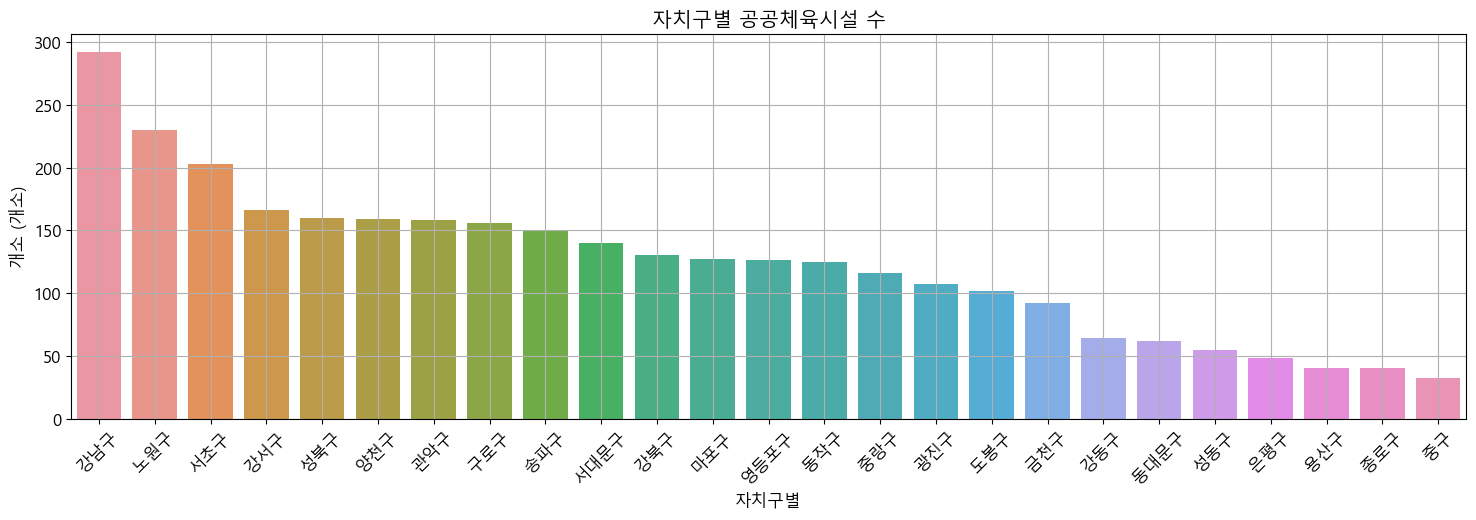

In [38]:
plt.figure(figsize=(18,5))
sb.barplot(data=df2,x='자치구별',y='개소 (개소)')
plt.title('자치구별 공공체육시설 수')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.close()

공공체육시설 집계 결과를 시각화한 결과 강남구가 1순위, 2순위는 노원구, 체육시설이 가장 모자란 곳은 중구로 나옴.
보행일상권에서 이미 제외 후보인 강남구 송파구를 제외하면 노원구가 1순위임. 

다각적인 분석 필요
1. 각 행정구별 면적 대비 체육시설 수로 따져서 진짜 많은건지 검증..(?)
2. 서울 시민들이 좋아하는 체육시설(대체로 축구장,야구장,다목적체육관등이 있겠으나 이거는 합당한 근거자료 필요할거 같음)
3. 그 외 기타 등등